In [40]:
import json

In [41]:
dados = json.load(open('../../Metricas/Indicios/CrossValidation/Average/NovasMetricas/novas_metricas_gold_average-HelBERT-uncased-fs.json'))

In [35]:
targets=['Certidão de protesto','Certificado de Boas Práticas','Comprovante de Localização',
         'Idoneidade Financeira', 'Patrimônio Integralizado','Licença Ambiental','Número de Atestados']
new_keys=['Precision','Recall','F1 score','Support']

In [42]:
dados_final = dados['cf_report']

In [44]:
relatorio_mapeado = {
    targets[int(k)]: v for k, v in dados_final.items() if k.isdigit()
}

In [45]:
relatorio_mapeado

{'Certidão de protesto': {'precision': 0.9704260651629072,
  'recall': 0.7693333333333334,
  'f1-score': 0.8563307493540051,
  'support': 24.2},
 'Certificado de Boas Práticas': {'precision': 0.9441558441558442,
  'recall': 0.8847619047619049,
  'f1-score': 0.9092645112497635,
  'support': 20.8},
 'Comprovante de Localização': {'precision': 0.9429791012658242,
  'recall': 0.9705076873798847,
  'f1-score': 0.9564417140207961,
  'support': 223.8},
 'Idoneidade Financeira': {'precision': 0.5,
  'recall': 0.175,
  'f1-score': 0.24444444444444446,
  'support': 8.0},
 'Patrimônio Integralizado': {'precision': 0.991044776119403,
  'recall': 0.990909090909091,
  'f1-score': 0.9909080393290919,
  'support': 66.0},
 'Licença Ambiental': {'precision': 0.9015007215007216,
  'recall': 0.9399122807017545,
  'f1-score': 0.9190460944704796,
  'support': 56.6},
 'Número de Atestados': {'precision': 0.86,
  'recall': 0.40888888888888886,
  'f1-score': 0.5296969696969697,
  'support': 9.4}}

In [46]:
for k in dados_final:
    if not k.isdigit():
        relatorio_mapeado[k] = dados_final[k]

In [47]:
relatorio_mapeado

{'Certidão de protesto': {'precision': 0.9704260651629072,
  'recall': 0.7693333333333334,
  'f1-score': 0.8563307493540051,
  'support': 24.2},
 'Certificado de Boas Práticas': {'precision': 0.9441558441558442,
  'recall': 0.8847619047619049,
  'f1-score': 0.9092645112497635,
  'support': 20.8},
 'Comprovante de Localização': {'precision': 0.9429791012658242,
  'recall': 0.9705076873798847,
  'f1-score': 0.9564417140207961,
  'support': 223.8},
 'Idoneidade Financeira': {'precision': 0.5,
  'recall': 0.175,
  'f1-score': 0.24444444444444446,
  'support': 8.0},
 'Patrimônio Integralizado': {'precision': 0.991044776119403,
  'recall': 0.990909090909091,
  'f1-score': 0.9909080393290919,
  'support': 66.0},
 'Licença Ambiental': {'precision': 0.9015007215007216,
  'recall': 0.9399122807017545,
  'f1-score': 0.9190460944704796,
  'support': 56.6},
 'Número de Atestados': {'precision': 0.86,
  'recall': 0.40888888888888886,
  'f1-score': 0.5296969696969697,
  'support': 9.4},
 'micro avg':

In [38]:
def rename_keys(dict_, new_keys):
    d1 = dict( zip( list(dict_.keys()), new_keys) )
    return {d1[oldK]: value for oldK, value in dict_.items()}

<Axes: >

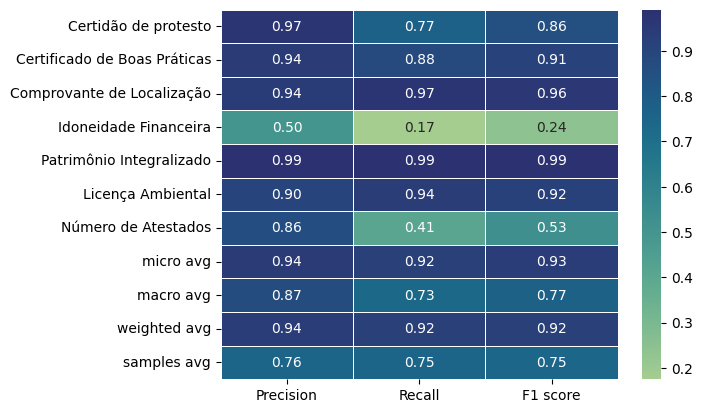

In [48]:
import seaborn as sns
import pandas as pd

w={}
for classe, data in relatorio_mapeado.items():
    w[classe]=rename_keys(relatorio_mapeado[classe], new_keys)
sns.heatmap(pd.DataFrame(w).iloc[:-1, :].T, annot=True, fmt=".2f",linewidth=.5, cmap="crest")